# HANDWRITTEN MATHEMATICAL EQUATION SOLVER

In [1]:
#Preparing the Dataset
#MNIST DATASET
#85709 images
#operators are numbered as 10,11,12,13 for /,+.-,* respectively

In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import seaborn as sns


In [3]:

np.random.seed(2)


In [4]:
#load the dataset
dataset = pd.read_csv("dataset.csv")


In [5]:
#Creating the label
y = dataset["label"]

In [6]:
#Drop the label
X= dataset.drop(labels = ["label"], axis = 1)

c:\users\91931\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


11    22164
12    21387
1      4684
7      4401
3      4351
9      4188
2      4177
6      4137
0      4132
4      4072
8      4063
5      3795
13       80
10       78
Name: label, dtype: int64

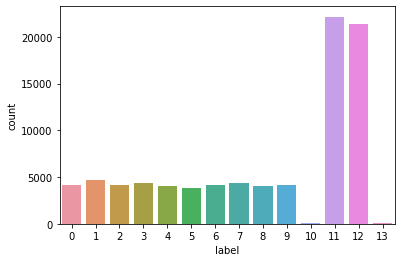

In [7]:
#overview of dataset
g = sns.countplot(y)
y.value_counts()


In [8]:
#Grayscale normalization
X = X / 255.0

In [9]:
#reshaping the dataset to fit standard of a 4dtensor of shape
X = X.values.reshape(-1,28,28,1)

In [10]:
#categorical conversion of label
y = to_categorical(y, num_classes = 14)

In [11]:
#90% training and 10% validation split
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1 , random_state = random_seed, stratify = y)

In [12]:
#model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from tensorflow import keras

In [13]:
#creating the instance of the model
model = Sequential()

In [14]:
#adding layers to the models
#layer 1
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu", input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [15]:
#layer 2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

In [16]:
#connect layer and its output
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(14, activation = "softmax"))

In [17]:
#setting optimizer
optimizer = RMSprop(lr = 0.001, rho = 0.9, epsilon = 1e-08, decay=0.0 )

model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accuracy",
                                            patience = 3,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.0001)

In [18]:
#data augumentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [19]:
datagen.fit(X_train)

In [20]:
#fitting the model
epochs = 5
batch_size = 86
history = model.fit_generator(
                                datagen.flow(X_train,y_train, batch_size=batch_size),
                                epochs = epochs, #An epoch is an iteration over the entire x and y data provided
                                validation_data = (X_val,y_val), #Data on which to evaluate the loss and any model metrics at the end of each epoch. 
                                verbose = 1, #output
                                steps_per_epoch=X_train.shape[0] // batch_size,  # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
                                callbacks=[learning_rate_reduction]                            
                              )


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
896/896 [==============================] - 415s 464ms/step - loss: 0.2697 - accuracy: 0.9181 - val_loss: 0.0606 - val_accuracy: 0.9796
Epoch 2/5
896/896 [==============================] - 397s 443ms/step - loss: 0.0820 - accuracy: 0.9751 - val_loss: 0.0354 - val_accuracy: 0.9901
Epoch 3/5
896/896 [==============================] - 373s 417ms/step - loss: 0.0648 - accuracy: 0.9813 - val_loss: 0.0316 - val_accuracy: 0.9918
Epoch 4/5
896/896 [==============================] - 428s 478ms/step - loss: 0.0582 - accuracy: 0.9834 - val_loss: 0.0329 - val_accuracy: 0.9916
Epoch 5/5
896/896 [==============================] - 472s 526ms/step - loss: 0.0577 - accuracy: 0.9840 - val_loss: 0.0268 - val_accuracy: 0.9922


In [24]:
#The model took about 35 mins to train and reached a validation accuracy of 99.30 % after the 5th epoch.

model.save("model.h5")

In [25]:
#Predictions
from PIL import Image
from itertools import groupby


In [26]:
#loading image in grayscale
image = Image.open("testing.png").convert("L")


In [27]:
#resizing to 28 height pixels
w = image.size[0]
h = image.size[1]
r = w / h # aspect ratio
new_w = int(r * 28)
new_h = 28
new_image = image.resize((new_w, new_h))


In [28]:
#converting to a numpy array
new_image_arr=np.array(new_image)

In [29]:
#inverting the image to make background = 0'
new_inv_image_arr = 255 - new_image_arr

In [30]:
#rescaling the image
final_image_arr = new_inv_image_arr / 255.0

In [31]:
#splitting image array into individual element arrays using non zero columns
m = final_image_arr.any(0)
out = [final_image_arr[:,[*g]] for k, g in groupby(np.arange(len(m)), lambda x: m[x] != 0) if k]

In [32]:
#iterating through the element arrays to resize them to match input #
#criteria of the model = [mini_batch_size, height, width, channels]
num_of_elements = len(out)
elements_list = []

In [33]:
for x in range(0, num_of_elements):
    img = out[x]
    
    #adding 0 value columns as fillers
    width = img.shape[1]
    filler = (final_image_arr.shape[0] - width) / 2
    
    if filler.is_integer() == False:    #odd number of filler columns
        filler_l = int(filler)
        filler_r = int(filler) + 1
    else:                               #even number of filler columns
        filler_l = int(filler)
        filler_r = int(filler)
    
    arr_l = np.zeros((final_image_arr.shape[0], filler_l)) #left fillers
    arr_r = np.zeros((final_image_arr.shape[0], filler_r)) #right fillers
    
    #concatinating the left and right fillers
    help_ = np.concatenate((arr_l, img), axis= 1)
    element_arr = np.concatenate((help_, arr_r), axis= 1)
    
    element_arr.resize(28, 28, 1) #resize array 2d to 3d
    #storing all elements in a list
    elements_list.append(element_arr)
elements_array = np.array(elements_list)


In [34]:
#reshaping to fit model input criteria'
elements_array = elements_array.reshape(-1, 28, 28, 1)

In [36]:
#predicting using the created model'
model = keras.models.load_model("model.h5")
elements_pred =  model.predict(elements_array)
elements_pred = np.argmax(elements_pred, axis = 1)

In [37]:
len(out)

9

In [38]:
elements_array.shape
#[mini batch size,height,width,channels]

(9, 28, 28, 1)

In [39]:
print(elements_pred)
#13== X
#11== +
#12== -

[ 4  5 13  2 11  9  5 12  5]


In [40]:
#creating the evaluator
def math_expression_generator(arr):
    
    op = {
              10,   # = "/"
              11,   # = "+"
              12,   # = "-"
              13    # = "*"
                  }   
    
    m_exp = []
    temp = []
        
    #creating a list separating all elements'
    for item in arr:
        if item not in op:
            temp.append(item)
        else:
            m_exp.append(temp)
            m_exp.append(item)
            temp = []
    if temp:
        m_exp.append(temp)
        
    #converting the elements to numbers and operators'
    i = 0
    num = 0
    for item in m_exp:
        if type(item) == list:
            if not item:
                m_exp[i] = ""
                i = i + 1
            else:
                num_len = len(item)
                for digit in item:
                    num_len = num_len - 1
                    num = num + ((10 ** num_len) * digit)
                m_exp[i] = str(num)
                num = 0
                i = i + 1
        else:
            m_exp[i] = str(item)
            m_exp[i] = m_exp[i].replace("10","/")
            m_exp[i] = m_exp[i].replace("11","+")
            m_exp[i] = m_exp[i].replace("12","-")
            m_exp[i] = m_exp[i].replace("13","*")
            
            i = i + 1
    
    
    #joining the list of strings to create the mathematical expression'
    separator = ' '
    m_exp_str = separator.join(m_exp)
    
    return (m_exp_str)

In [41]:
#creating the mathematical expression
m_exp_str = math_expression_generator(elements_pred)

In [42]:
#calculating the mathematical expression using eval()'
while True:
    try:
        answer = eval(m_exp_str)    #evaluating the answer
        answer = round(answer, 2)
        equation  = m_exp_str + " = " + str(answer)
        print(equation)   #printing the equation
        break

    except SyntaxError:
        print("Invalid predicted expression!!")
        print("Following is the predicted expression:")
        print(m_exp_str)
        break

45 * 2 + 95 - 5 = 180


In [43]:
m_str=math_expression_generator(elements_pred)


In [44]:
print(m_str)

45 * 2 + 95 - 5


In [45]:
print(equation)

45 * 2 + 95 - 5 = 180


In [46]:
import gradio as gr
from PIL import Image
from itertools import groupby

# load the model
model = keras.models.load_model("model.h5")

def solve_eqn(image):
    w = image.size[0]
    h = image.size[1]
    r = w / h # aspect ratio
    new_w = int(r * 28)
    new_h = 28
    image = image.resize((new_w, new_h))
    new_image_arr=np.array(image)
    new_inv_image_arr = 255 - new_image_arr
    final_image_arr = new_inv_image_arr / 255.0
    m = final_image_arr.any(0)
    out = [final_image_arr[:,[*g]] for k, g in groupby(np.arange(len(m)), lambda x: m[x] != 0) if k]
    num_of_elements = len(out)
    elements_list = []
    for x in range(0, num_of_elements):
        img = out[x]

        #adding 0 value columns as fillers
        width = img.shape[1]
        filler = (final_image_arr.shape[0] - width) / 2

        if filler.is_integer() == False:    #odd number of filler columns
            filler_l = int(filler)
            filler_r = int(filler) + 1
        else:                               #even number of filler columns
            filler_l = int(filler)
            filler_r = int(filler)

        arr_l = np.zeros((final_image_arr.shape[0], filler_l)) #left fillers
        arr_r = np.zeros((final_image_arr.shape[0], filler_r)) #right fillers

        #concatinating the left and right fillers
        help_ = np.concatenate((arr_l, img), axis= 1)
        element_arr = np.concatenate((help_, arr_r), axis= 1)

        element_arr.resize(28, 28, 1) #resize array 2d to 3d
        #storing all elements in a list
        elements_list.append(element_arr)
    elements_array = np.array(elements_list)
    elements_array = elements_array.reshape(-1, 28, 28, 1)
    elements_pred =  model.predict(elements_array)
    elements_pred = np.argmax(elements_pred, axis = 1)
    m_exp_str = math_expression_generator(elements_pred)
    while True:
        try:
            answer = eval(m_exp_str)    #evaluating the answer
            answer = round(answer, 2)
            equation  = m_exp_str + " = " + str(answer)
            #print(equation)   #printing the equation
            break

        except SyntaxError:
            print("Invalid predicted expression!!")
            print("Following is the predicted expression:")
            print(m_exp_str)
            break
    return equation

image = gr.inputs.Image(shape=None,source="upload",type="pil",image_mode="L")
label=gr.outputs.Label(equation)
gr.Interface(
    fn=solve_eqn,
    inputs=image,
    outputs=label,
).launch()



Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<fastapi.applications.FastAPI at 0x2c0d1b55d60>,
 'http://127.0.0.1:7860/',
 None)